In [1]:
from sklearn.ensemble import RandomForestRegressor

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense,Activation
from keras import optimizers
import seaborn as sns

import pandas as pd
import matplotlib.pyplot as plt

import os.path
import datetime
#训练文件夹
TrainFolder='H:\\12_Kaggle\\toollife\\pythonProject\\PreProcessed'
TestFolder='H:\\12_Kaggle\\toollife\\pythonProject\\FinalPreProcessed'
ResultFolder='H:\\12_Kaggle\\toollife\\pythonProject\\Result'

Using TensorFlow backend.


In [ ]:
#写一个判断分数
def sc():
    

In [2]:
%matplotlib inline  
#设置图像大小
import matplotlib # 注意这个也要import一次
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize # import figsize
figsize(3,3) # 设置 figsize   不用这个也可以通过调整像素调整大小
plt.rcParams['savefig.dpi'] = 200 #图片像素
plt.rcParams['figure.dpi'] = 200 #分辨率

In [3]:
all="All_1min_Additional_Orig_PlusLife_122row.csv"
all='All_1min_Additional_Orig_PlusLife_109row_lean.csv'
all='All_1min_Additional_Orig_PlusFeatures.csv'
all='All_1min_Additional_Orig_PlusFeatures_OutliersRemoved.csv'
all='All_1min_feature_noOutliers.csv'
# all='1s_no_outliers.csv'
# all='1s_featureset1.csv'
filepath=os.path.join(TrainFolder,all)
df=pd.read_csv(filepath)

In [4]:
testname='All_feature_1min_Final.csv'
testfile=os.path.join(TestFolder,testname)
df_test=pd.read_csv(testfile)

In [5]:
df_test[[features_final]]

NameError: name 'features_final' is not defined

In [251]:
df.columns

Index(['Unnamed: 0', 'm', 'csv', 'duration', 'c', 'spindle_load_mean',
       'sl_std', 'sl_min', 'sl_25', 'sl_50', 'sl_75', 'sl_max', 'x_disp_max',
       'x_disp_mean', 'x_disp_sum', 'y_disp_max', 'y_disp_mean', 'y_disp_sum',
       'z_disp_max', 'z_disp_mean', 'z_disp_sum', 'x_move_count',
       'y_move_count', 'z_move_count', 'all_displacement', 'c1', 'v1_mean',
       'v1_std', 'v1_min', 'v1_25', 'v1_50', 'v1_75', 'v1_max', 'c2',
       'v2_mean', 'v2_std', 'v2_min', 'v2_25', 'v1_50.1', 'v2_75', 'v2_max',
       'c3', 'v3_mean', 'v3_std', 'v3_min', 'v3_25', 'v3_50', 'v3_75',
       'v3_max', 'c4', 'cu_mean', 'cu_std', 'cu_min', 'cu_25', 'cu_50',
       'cu_75', 'cu_max', 'v1_rms', 'v1_Xp', 'v1_Ip', 'v1_Cf', 'v1_Ce',
       'v1_Cw', 'v1_Cq', 'v2_rms', 'v2_Xp', 'v2_Ip', 'v2_Cf', 'v2_Ce', 'v2_Cw',
       'v2_Cq', 'v3_rms', 'v3_Xp', 'v3_Ip', 'v3_Cf', 'v3_Ce', 'v3_Cw', 'v3_Cq',
       'life'],
      dtype='object')

In [ ]:
#需要检查每一个m和csv，在x,y,z方向运动


In [6]:
features_all_list=['spindle_load_mean',
       'sl_std', 'sl_min', 'sl_25', 'sl_50', 'sl_75', 'sl_max','v1_mean',
       'v1_std', 'v1_min', 'v1_25', 'v1_50', 'v1_75', 'v1_max', 'c2',
       'v2_mean', 'v2_std', 'v2_min', 'v2_25', 'v1_50.1', 'v2_75', 'v2_max',
       'c3', 'v3_mean', 'v3_std', 'v3_min', 'v3_25', 'v3_50', 'v3_75',
       'v3_max', 'c4', 'cu_mean', 'cu_std', 'cu_min', 'cu_25', 'cu_50',
       'cu_75', 'cu_max', 'v1_rms', 'v1_Xp', 'v1_Ip', 'v1_Cf', 'v1_Ce',
       'v1_Cw', 'v1_Cq', 'v2_rms', 'v2_Xp', 'v2_Ip', 'v2_Cf', 'v2_Ce', 'v2_Cw',
       'v2_Cq', 'v3_rms', 'v3_Xp', 'v3_Ip', 'v3_Cf', 'v3_Ce', 'v3_Cw', 'v3_Cq']
#1. 用这一系列feature，最好的效果是按照从大到小corr取8个feature，也就是
#['sl_max', 'sl_std', 'cu_min', 'cu_mean', 'v2_25', 'v2_75', 'sl_75', 'v1_50',

#2. 尝试减少一些重复的feature，比如所有的25和75
features_all_list=['spindle_load_mean',
       'sl_std', 'sl_max','v1_mean',
       'v1_std', 'v1_min',  'v1_50', 'v1_max', 
       'v2_mean', 'v2_std', 'v2_min', 'v1_50.1', 'v2_max', 'v3_mean', 'v3_std', 'v3_min' , 'v3_50',
       'v3_max', 'c4', 'cu_mean', 'cu_std', 'cu_min', 'cu_50', 'cu_max', 'v1_rms', 'v1_Xp', 'v1_Ip', 'v1_Cf', 'v1_Ce',
       'v1_Cw', 'v1_Cq', 'v2_rms', 'v2_Xp', 'v2_Ip', 'v2_Cf', 'v2_Ce', 'v2_Cw',
       'v2_Cq', 'v3_rms', 'v3_Xp', 'v3_Ip', 'v3_Cf', 'v3_Ce', 'v3_Cw', 'v3_Cq']

#在这个系列，展现了很高的泛华能力，用14个feature也能达到在其他数据集上都有0.6-0.7左右的分数 如下是14个
#['sl_max', 'sl_std', 'cu_min', 'cu_mean', 'v1_50', 'cu_max', 'v2_Cf', 'v1_max', 'v1_rms', 'v1_std', 'v1_Xp', 'v3_Cq', 'v1_min', 'v1_mean',

#3. 再次尝试减少一些重复的feature，比如不要sl，只留下mean，std,min,max,不行，

#4 尝试在2的基础上，不要各类50
features_all_list=['spindle_load_mean',
       'sl_std','sl_max','v1_mean',
       'v1_std', 'v1_min',  'v1_max', 
       'v2_mean', 'v2_std', 'v2_min', 'v2_max', 'v3_mean', 'v3_std', 'v3_min' ,
       'v3_max', 'c4', 'cu_mean', 'cu_std', 'cu_min', 'cu_max', 'v1_rms', 'v1_Xp', 'v1_Ip', 'v1_Cf', 'v1_Ce',
       'v1_Cw', 'v1_Cq', 'v2_rms', 'v2_Xp', 'v2_Ip', 'v2_Cf', 'v2_Ce', 'v2_Cw',
       'v2_Cq', 'v3_rms', 'v3_Xp', 'v3_Ip', 'v3_Cf', 'v3_Ce', 'v3_Cw', 'v3_Cq']
#结果和2相似，最终最好结果在13个feature，'sl_max', 'sl_std', 'cu_min', 'cu_mean',
# 'cu_max', 'v2_Cf', 'v1_max', 'v1_rms', 'v1_std', 'v1_Xp', 'v3_Cq','v1_min', 'v1_mean', 'cu_std'

#5测试到最终14个feature以后，综合互相之间的线性关系，再去掉几个，去掉cu_min，去掉v1_min，v1_std，
features_all_list=['spindle_load_mean',
       'sl_std','sl_max',
        'v1_mean', 'v1_max', 
       'v2_mean'  'v2_max', 'v3_mean', 'v3_max', 'cu_mean', 'cu_std', 'cu_max', 'v1_rms', 'v1_Xp', 'v1_Ip', 'v1_Cf', 'v1_Ce',
       'v1_Cw', 'v1_Cq', 'v2_rms', 'v2_Xp', 'v2_Ip', 'v2_Cf', 'v2_Ce', 'v2_Cw',
       'v2_Cq', 'v3_rms', 'v3_Xp', 'v3_Ip', 'v3_Cf', 'v3_Ce', 'v3_Cw', 'v3_Cq']
#如上，最终效果更好了，在14个feature达到了3个0.65，或者更多的时候，也比较稳定

#6再尝试去掉v2_min, v2_std,v3等，用10个feature就可
#['sl_max', 'sl_std', 'cu_mean', 'cu_max', 'v2_Cf', 'v1_max', 'v1_rms', 'v1_Xp', 'v3_Cq', 'v1_mean',  
#再添加'cu_std', 'cu_std', 'v3_Cw', 'v1_Cf', 'spindle_load_mean', 'v2_Ip',影响结果较小

features_all_list=['spindle_load_mean',
       'sl_std','sl_max',
        'v1_mean', 'v1_max', 
       'v2_mean','v2_max', 'v3_mean', 'v3_max', 'cu_mean', 'cu_std', 'cu_max', 'v1_rms', 'v1_Xp', 'v1_Ip', 'v1_Cf', 'v1_Ce',
       'v1_Cw', 'v1_Cq', 'v2_rms', 'v2_Xp', 'v2_Ip', 'v2_Cf', 'v2_Ce', 'v2_Cw',
       'v2_Cq', 'v3_rms', 'v3_Xp', 'v3_Ip', 'v3_Cf', 'v3_Ce', 'v3_Cw', 'v3_Cq']

feature_and_life=features_all_list+['life']

In [7]:
dfdata=df[feature_and_life]

In [8]:
#相互之间corr
dfdata.corr()['life'].abs().sort_values()

v3_max               0.013217
v3_Ce                0.014970
v3_Xp                0.032662
v3_mean              0.036288
v3_Cf                0.062648
v1_Cq                0.073360
v2_mean              0.080422
v2_Cq                0.106863
v3_Ip                0.122265
v2_Cw                0.124249
v3_rms               0.171973
v1_Cw                0.180589
v1_Ce                0.187784
v1_Ip                0.190970
v2_Xp                0.192659
v2_max               0.197813
v2_rms               0.218222
v2_Ce                0.245425
v2_Ip                0.248796
spindle_load_mean    0.257183
v1_Cf                0.264714
v3_Cw                0.272184
cu_std               0.278427
v1_mean              0.299995
v3_Cq                0.314091
v1_Xp                0.319245
v1_rms               0.338116
v1_max               0.341723
v2_Cf                0.343348
cu_max               0.370702
cu_mean              0.430217
sl_std               0.581583
sl_max               0.789738
life      

In [9]:
flist_by_corr=list(dfdata.corr()['life'].abs().sort_values().index)

In [10]:
flist_by_corr.reverse()

In [11]:
flist_by_corr=flist_by_corr[1:]

In [12]:
flist_by_corr

['sl_max',
 'sl_std',
 'cu_mean',
 'cu_max',
 'v2_Cf',
 'v1_max',
 'v1_rms',
 'v1_Xp',
 'v3_Cq',
 'v1_mean',
 'cu_std',
 'v3_Cw',
 'v1_Cf',
 'spindle_load_mean',
 'v2_Ip',
 'v2_Ce',
 'v2_rms',
 'v2_max',
 'v2_Xp',
 'v1_Ip',
 'v1_Ce',
 'v1_Cw',
 'v3_rms',
 'v2_Cw',
 'v3_Ip',
 'v2_Cq',
 'v2_mean',
 'v1_Cq',
 'v3_Cf',
 'v3_mean',
 'v3_Xp',
 'v3_Ce',
 'v3_max']

In [26]:
testfile="All_feature_1min_Final.csv"
testfilepath=os.path.join(TestFolder,testfile)
df_test=pd.read_csv(testfilepath)

In [55]:
#看没有x，没有y运动的时间
df[df['x_disp_sum']==0].count()[0],df[df['y_disp_sum']==0].count()[0],df[df['z_disp_sum']==0].count()[0],

KeyError: 'x_disp_sum'

In [13]:
#1min，写 一个函数用来产生不同的feature组合,需要flist_by_corr
result_list_self=[]
result_3m=[]
for i in range(2,20): #最少feature数量以及最多feature数量
    flist_train=flist_by_corr[:i]
    df_f=df[flist_train]
    x=np.array(df_f)
    y=np.array(df['life'])

    X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.33)
    
    
    # 随机森林
    model= RandomForestRegressor(n_estimators=100) 
    # Train the model using the training sets and check score 
    model.fit(X_train, y_train) 

    result_list_self.append([len(flist_train),flist_train,model.score(X_train,y_train),model.score(X_test,y_test)])
    print('training with', len(flist_train),model.score(X_train,y_train),model.score(X_test,y_test))
    
    #需要测试泛化能力
    df0=df[df['m']==0]
    df1=df[df['m']==1]
    df2=df[df['m']==2]
    indexlist=[0,1,2]
    dflist=[df0,df1,df2]

    for n in range(3): #3个循环
        index=indexlist[n]
        print(index)
        l_copy=indexlist.copy()
        l_copy.remove(index)
        print(l_copy)

        df_test=dflist[index]
        need_to_concat=dflist[l_copy[0]]
        df_train=pd.concat([dflist[l_copy[0]],dflist[l_copy[1]]])

        X_train=np.array(df_train[flist_train])

        y_train=np.array(df_train['life'])

        X_test=np.array(df_test[flist_train])
        y_test=np.array(df_test['life'])

        # 随机森林
        modelRF= RandomForestRegressor(n_estimators=1000) 
        # Train the model using the training sets and check score 
        modelRF.fit(X_train, y_train) 
        print('随机森林',modelRF.score(X_train,y_train),modelRF.score(X_test,y_test))  #两种计算r2是一样的
        result_3m.append([n,flist_train,modelRF.score(X_train,y_train),modelRF.score(X_test,y_test)])
        

training with 2 0.9399714679212658 0.6280501691546092
0
[1, 2]
随机森林 0.9503410932658469 0.5937493025301634
1
[0, 2]
随机森林 0.9607262774179848 0.45543340601776716
2
[0, 1]
随机森林 0.9541635682729971 0.1522621503433117
training with 3 0.9650096796874658 0.7732174853049875
0
[1, 2]
随机森林 0.9778256815578205 0.6058345945101526
1
[0, 2]
随机森林 0.9737866446197276 0.5757918659882975
2
[0, 1]
随机森林 0.9772097314019073 0.4820959177930361
training with 4 0.9733127861306684 0.8293766042698532
0
[1, 2]
随机森林 0.9778500289165131 0.6755525689768522
1
[0, 2]
随机森林 0.9757212794522606 0.659304165531306
2
[0, 1]
随机森林 0.9783125870802583 0.5182921718155603
training with 5 0.9721956838141941 0.8315107120923168
0
[1, 2]
随机森林 0.977145255517217 0.6819766203064248
1
[0, 2]
随机森林 0.9789111172291847 0.6157136900251986
2
[0, 1]
随机森林 0.9784291103168953 0.49593945209133694
training with 6 0.9733484341451148 0.7843553588323438
0
[1, 2]
随机森林 0.9759621178648142 0.6661582833520128
1
[0, 2]
随机森林 0.980133912992641 0.62252286935167
2
[0,

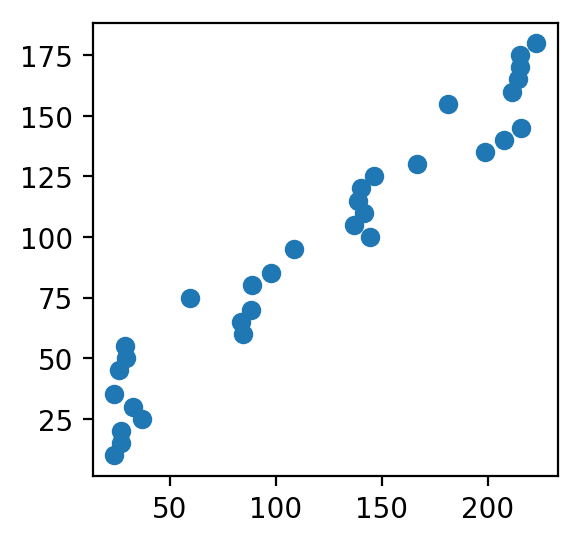

In [268]:
plt.scatter(modelRF.predict(X_test),y_test)

In [160]:
result_list_self

[[2, ['sl_max', 'sl_std'], 0.94610522502214, 0.7169058452393368],
 [3, ['sl_max', 'sl_std', 'cu_min'], 0.9618343903999135, 0.6722583573304644],
 [4,
  ['sl_max', 'sl_std', 'cu_min', 'cu_mean'],
  0.9718737539815514,
  0.6922280209563868],
 [5,
  ['sl_max', 'sl_std', 'cu_min', 'cu_mean', 'cu_max'],
  0.9739138745978526,
  0.7831491960655939],
 [6,
  ['sl_max', 'sl_std', 'cu_min', 'cu_mean', 'cu_max', 'v2_Cf'],
  0.9641243173629365,
  0.8796546141794128],
 [7,
  ['sl_max', 'sl_std', 'cu_min', 'cu_mean', 'cu_max', 'v2_Cf', 'v1_max'],
  0.9628207780698097,
  0.8480644472045298],
 [8,
  ['sl_max',
   'sl_std',
   'cu_min',
   'cu_mean',
   'cu_max',
   'v2_Cf',
   'v1_max',
   'v1_rms'],
  0.9688782709573706,
  0.7779779666534052],
 [9,
  ['sl_max',
   'sl_std',
   'cu_min',
   'cu_mean',
   'cu_max',
   'v2_Cf',
   'v1_max',
   'v1_rms',
   'v1_std'],
  0.965932612568181,
  0.8939273601971622],
 [10,
  ['sl_max',
   'sl_std',
   'cu_min',
   'cu_mean',
   'cu_max',
   'v2_Cf',
   'v1_max',

In [134]:
df['life']

0      230.0
1      225.0
2      220.0
3      215.0
4      210.0
5      205.0
6      200.0
7      195.0
8      190.0
9      185.0
10     175.0
11     170.0
12     165.0
13     160.0
14     155.0
15     150.0
16     145.0
17     140.0
18     135.0
19     130.0
20     125.0
21     120.0
22     115.0
23     110.0
24     105.0
25      95.0
26      90.0
27      85.0
28      80.0
29      75.0
       ...  
84     170.0
85     165.0
86     160.0
87     155.0
88     145.0
89     140.0
90     135.0
91     130.0
92     125.0
93     120.0
94     115.0
95     110.0
96     105.0
97     100.0
98      95.0
99      85.0
100     80.0
101     75.0
102     70.0
103     65.0
104     60.0
105     55.0
106     50.0
107     45.0
108     35.0
109     30.0
110     25.0
111     20.0
112     15.0
113     10.0
Name: life, dtype: float64

In [74]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.33)

In [265]:
#尝试用1，2训练，3测试，或者其他的组合
# df0=df[df['Machine']==0]
# df1=df[df['Machine']==1]
# df2=df[df['Machine']==2]
df0=df[df['m']==0]
df1=df[df['m']==1]
df2=df[df['m']==2]
indexlist=[0,1,2]
dflist=[df0,df1,df2]

for n in range(3): #3个循环
    index=indexlist[n]
    print(index)
    l_copy=indexlist.copy()
    l_copy.remove(index)
    print(l_copy)
    
    df_test=dflist[index]
    need_to_concat=dflist[l_copy[0]]
    df_train=pd.concat([dflist[l_copy[0]],dflist[l_copy[1]]])

    X_train=np.array(df_train[x_features_1s])

    y_train=np.array(df_train['life'])

    X_test=np.array(df_test[x_features_1s])
    y_test=np.array(df_test['life'])

    # 随机森林
    modelRF= RandomForestRegressor(n_estimators=100) 
    # Train the model using the training sets and check score 
    modelRF.fit(X_train, y_train) 

    predicted=modelRF.predict(X_train)
    print('随机森林',modelRF.score(X_train,y_train),r2_score(y_train,predicted),modelRF.score(X_test,y_test))  #两种计算r2是一样的
    
    #多元线性回归
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    print('线性回归：',lr.score(X_train,y_train),lr.score(X_test,y_test))

0
[1, 2]
随机森林 0.9506948139938759 0.9506948139938759 0.2807731255439445
线性回归： 0.8934120381036034 0.5496129971636003
1
[0, 2]
随机森林 0.9716713606145063 0.9716713606145064 -0.0851683928418896
线性回归： 0.9289924372361811 -0.5385779783455789
2
[0, 1]
随机森林 0.9655562795073199 0.9655562795073198 -1.2442411880183721
线性回归： 0.8972163751059764 0.2306355369030206


# 最终feature 


In [27]:
feature_final=['sl_max', 'sl_std', 'cu_min', 
               'cu_mean', 'v1_50', 'cu_max', 'v2_Cf', 'v1_max', 'v1_rms', 'v1_std', 'v1_Xp', 'v3_Cq', 'v1_min', 'v1_mean']

In [28]:
feature_final=['sl_max', 'sl_std', 'cu_mean', 'v1_50', 'cu_max', 'v2_Cf', 'v1_rms', 'v1_Xp', 'v3_Cq', 'v1_min', 'v1_mean']

In [29]:
#1218
feature_final=['sl_max', 'sl_std', 'cu_mean', 'cu_max', 'v2_Cf', 'v1_max', 'v1_rms', 'v1_Xp', 'v3_Cq', 'v1_mean']

In [17]:
#探索final之间的相关性，太高的可以考虑去除避免过拟合,
# cu_min和cu_max，去掉cu_min，
#v2_cf和v1_max，先不去除
#v1_max和v1_min，v1_rms，v1 std都高度相似，保留去掉v1_max，去掉v1_std
dq=df[feature_final]
dq.corr()

,sl_max,sl_std,cu_mean,cu_max,v2_Cf,v1_max,v1_rms,v1_Xp,v3_Cq,v1_mean
sl_max,1.000000,0.685676,-0.218392,0.406751,-0.297858,0.351030,0.351087,0.336119,-0.126041,0.156291
sl_std,0.685676,1.000000,0.100531,0.300185,-0.379840,0.488774,0.072460,0.477881,-0.054711,0.223430
cu_mean,-0.218392,0.100531,1.000000,0.180628,-0.119224,0.310115,-0.263269,0.320575,0.138039,-0.073731
cu_max,0.406751,0.300185,0.180628,1.000000,-0.199615,0.300703,0.222839,0.278347,-0.112232,-0.142053
v2_Cf,-0.297858,-0.379840,-0.119224,-0.199615,1.000000,-0.786780,-0.330421,-0.797020,0.044659,-0.309198
v1_max,0.351030,0.488774,0.310115,0.300703,-0.786780,1.000000,0.405438,0.992191,-0.046270,-0.038452
v1_rms,0.351087,0.072460,-0.263269,0.222839,-0.330421,0.405438,1.000000,0.416335,0.040566,-0.229612
v1_Xp,0.336119,0.477881,0.320575,0.278347,-0.797020,0.992191,0.416335,1.000000,-0.028728,-0.046526
v3_Cq,-0.126041,-0.054711,0.138039,-0.112232,0.044659,-0.046270,0.040566,-0.028728,1.000000,-0.150508
v1_mean,0.156291,0.223430,-0.073731,-0.142053,-0.309198,-0.038452,-0.229612,-0.046526,-0.150508,1.000000


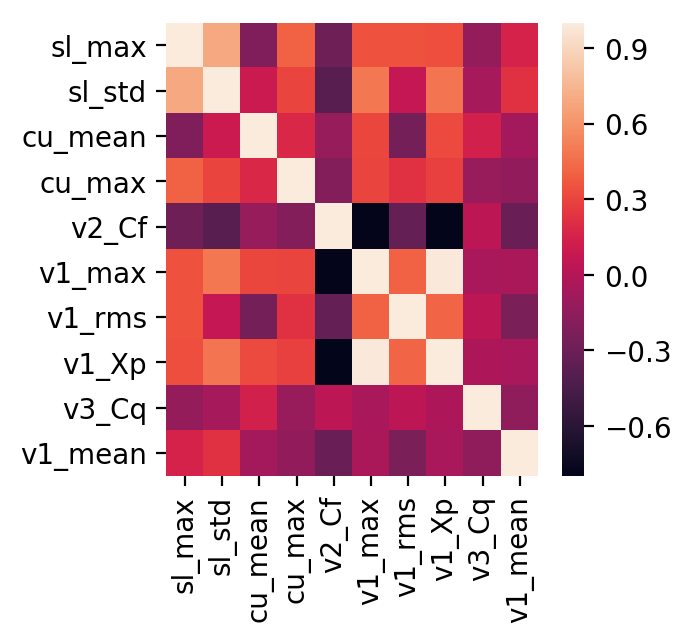

In [18]:
sns.heatmap(dq.corr())

In [20]:
#用所有数据进行训练
X_train=np.array(df[feature_final])
y_train=np.array(df['life'])

In [21]:
#trick去掉最早的30分钟
X_train=np.array(df[feature_final].loc[6:])
y_train=np.array(df['life'].loc[6:])

In [30]:
# 随机森林
model= RandomForestRegressor(n_estimators=100) 
# Train the model using the training sets and check score 
model.fit(X_train, y_train) 

predicted=model.predict(X_train)
model.score(X_train,y_train)

0.9771878887378059

In [31]:
test_final=df_test[feature_final]
test_final

,sl_max,sl_std,cu_mean,cu_max,v2_Cf,v1_max,v1_rms,v1_Xp,v3_Cq,v1_mean
0,28.672140,5.622782,-0.016936,2.317315,-7.371072e+03,12.752338,3.609057,11.637155,0.000002,0.033248
1,23.734245,3.598253,-0.017064,2.284748,-3.361861e+03,12.776493,3.664424,11.520258,0.000002,0.034018
2,24.365978,4.337720,-0.017204,2.321198,-6.661958e+03,14.376966,3.884186,12.481737,0.000002,0.033178
3,29.297770,6.293726,-0.017559,2.318617,-4.688465e+03,13.730873,3.386167,12.583592,0.000002,0.033095
4,25.467695,3.929477,-0.018082,2.292281,-6.964252e+03,12.942531,3.566307,11.780904,0.000002,0.034672
5,27.646717,4.516128,-0.017707,2.303282,-3.071479e+03,12.734527,3.936080,11.650221,0.000002,0.032465
6,29.505295,6.265712,-0.017841,2.319077,2.575914e+06,12.610212,3.544633,11.697726,0.000002,0.034722
7,24.027224,4.480909,-0.017911,2.288960,-2.747595e+03,13.698544,3.577844,11.650868,0.000002,0.034027
8,24.381237,3.419924,-0.017654,2.295616,-7.007502e+03,13.777964,4.106694,12.349676,0.000002,0.034090
9,27.912230,5.704064,-0.015167,2.372380,-1.925821e+03,14.459314,2.867219,12.550507,0.000003,0.035373


In [24]:
test_final.isnull().any(1)

82     False
83     False
84     False
85     False
86     False
87     False
88     False
89     False
90     False
91     False
92     False
93     False
94     False
95     False
96     False
97     False
98     False
99     False
100    False
101    False
102    False
103    False
104    False
105    False
106    False
107    False
108    False
109    False
110    False
111    False
112    False
113    False
dtype: bool

In [208]:
test_final2=test_final.drop(14)

In [210]:
test_final2.isnull().any(1)
test_final2.to_csv('H:\\12_Kaggle\\toollife\\pythonProject\\TestPreProcessed\\All_feature_1min_noNull.csv')

In [225]:
#输出结果
# dft=pd.read_csv('H:\\12_Kaggle\\toollife\\pythonProject\\TestPreProcessed\\All_feature_1min_test_noout.csv')
X_test=np.array(dft[feature_final])

In [32]:
predicted=model.predict(test_final)
predicted

array([141.7 , 196.7 , 198.35,  75.45, 190.3 , 184.2 ,  75.85, 197.25,
       195.5 , 173.85, 187.4 , 173.1 , 191.85, 191.  ,  72.05, 184.6 ,
        72.85,  64.9 , 196.1 ,  67.3 , 195.55, 196.3 , 187.25, 192.8 ,
       180.25,  72.15, 174.  , 187.1 , 185.75, 189.05,  69.65, 186.15,
       172.45,  77.85,  70.65,  56.25])

In [33]:
r=pd.DataFrame(predicted)
rr=r.join(dft)

NameError: name 'dft' is not defined

In [34]:
r.to_csv('H:\\12_Kaggle\\toollife\\pythonProject\\Result\\Final.csv')

In [293]:
rr.to_csv('H:\\12_Kaggle\\toollife\\pythonProject\\Result\\x1218.csv')

In [331]:
#多元线性回归
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train),lr.score(X_test,y_test)

(0.9024673041957672, 0.8291638410258347)

In [190]:
#神经网络模型
# def r2(y_true,y_pred): #自己定义一个metrics方便,todo
#     return y_true

model=Sequential()
# model.add(Dense(input_dim=14,activation='relu',units=3))
# model.add(Dense(activation='relu',units=24))
# model.add(Dense(activation='relu',units=12))
# model.add(Dense(activation='sigmoid',units=1))


model.add(Dense(input_dim=14,activation='relu',units=16))
model.add(Dense(activation='relu',units=48))
# model.add(Dense(activation='relu',units=128))
model.add(Dense(activation='relu',units=6))
# model.add(Dense(activation='relu',units=12))
model.add(Dense(activation='relu',units=1))


# opt = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.9, epsilon=1e-08, amsgrad=True)
opt = optimizers.Adam(lr=0.01)

# Compile model
# model.compile(loss='mse', optimizer=opt, metrics=['accuracy'])
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
# Fit the model
# model.fit(X_train, y_train, epochs=75, batch_size=100)
model.fit(X_train, y_train,epochs=75,batch_size=16)    #16，128，1，batch=16，得到loss3544

Epoch 1/75
114/114 [==============================] - 0s 4ms/step - loss: 17042.5439 - acc: 0.0000e+00
Epoch 2/75
114/114 [==============================] - 0s 87us/step - loss: 17042.5439 - acc: 0.0000e+00
Epoch 3/75
114/114 [==============================] - 0s 105us/step - loss: 17042.5439 - acc: 0.0000e+00
Epoch 4/75
114/114 [==============================] - 0s 96us/step - loss: 17042.5439 - acc: 0.0000e+00
Epoch 5/75
114/114 [==============================] - 0s 70us/step - loss: 17042.5439 - acc: 0.0000e+00
Epoch 6/75
114/114 [==============================] - 0s 87us/step - loss: 17042.5439 - acc: 0.0000e+00
Epoch 7/75
114/114 [==============================] - 0s 114us/step - loss: 17042.5439 - acc: 0.0000e+00
Epoch 8/75
114/114 [==============================] - 0s 87us/step - loss: 17042.5439 - acc: 0.0000e+00
Epoch 9/75
114/114 [==============================] - 0s 78us/step - loss: 17042.5439 - acc: 0.0000e+00
Epoch 10/75
114/114 [==============================] - 0s 79us/

In [302]:
predicted=model.predict(X_train)
predicted_test=model.predict(X_test)
r2_score(y_train,predicted),r2_score(y_test,predicted_test)

(0.9756996490379827, 0.8268850284786539)

In [ ]:
history = model.fit(X_train, y_train,
             epochs=10,
             batch_size=32,
             validation_data=(X_test, y_test),
             )

In [336]:
model.score(X_train,y_train)

0.9759341141622716

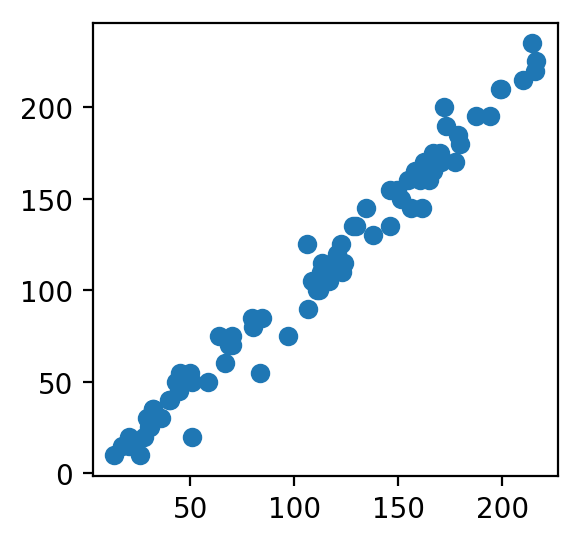

In [303]:
train_predicted=model.predict(X_train)
plt.scatter(train_predicted,y_train)

In [351]:
model.score(X_test,y_test) 

ValueError: Number of features of the model must match the input. Model n_features is 14 and input n_features is 23 

In [338]:
#Predict Output 
predicted= model.predict(X_test) 


array([222.71333333, 212.12166667, 216.67333333, 209.41666667,
       217.20333333, 167.39666667, 213.44833333, 212.805     ,
       202.035     , 170.48      , 163.315     , 141.775     ,
       145.98833333,  99.57166667, 145.00833333, 148.035     ,
       104.905     ,  79.06833333,  71.80666667,  80.32333333,
        80.49166667,  78.63      ,  74.76666667,  36.76833333,
        43.16166667,  30.44333333,  33.68666667,  23.86      ,
        24.74166667,  35.12      ,  36.31      ,  36.48333333])

ValueError: x and y must be the same size

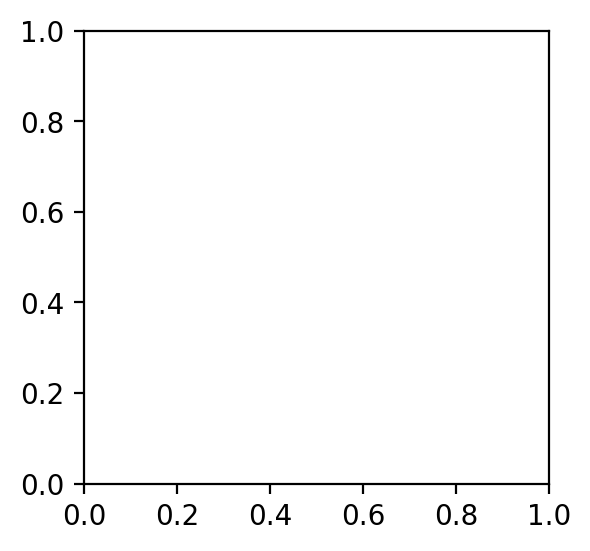

In [350]:
#validation结果
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(predicted,y_test)
ax.set_xlabel('predicted')
ax.set_ylabel('real')
plt.tight_layout
plt.show()

In [361]:
len(x1),len(y)

(117, 117)

In [362]:
#输出值


#首先用所有数据训练，而不是部分数据
# 随机森林
model_final= RandomForestRegressor(n_estimators=1000) 
# Train the model using the training sets and check score 
model_final.fit(x1, y) 

predicted=model_final.predict(X_train)

testfile="Test_All_1min.csv"
testfile="Test_All_1min_Additional_All_OutliersRemoved.csv"
testfilepath=os.path.join(TestFolder,testfile)
df_test=pd.read_csv(testfilepath)

TestX=np.array(df_test[x1_features])

predicted_Test=model_final.predict(TestX)
predicted_Test

array([140.485, 167.065, 162.88 ,  31.4  , 176.365, 192.89 , 178.385,
       163.92 , 161.425, 163.055, 165.5  , 151.425, 171.6  , 134.445,
       177.37 , 188.4  , 175.665, 178.24 , 186.735, 183.095, 181.26 ,
       170.43 , 177.87 , 176.3  , 162.4  , 166.89 , 111.41 ,  96.765,
        98.75 ,  95.88 ,  96.43 , 109.18 , 112.585, 176.5  , 182.045,
        73.015, 138.73 , 114.765, 116.59 , 113.62 , 152.545,  41.12 ,
       133.29 ,  38.085,  48.19 ])

In [363]:
x1_features

['sl_mean',
 'sl_std',
 'sl_max',
 'vibration_1_min',
 'vibration_1_25%',
 'vibration_1_50%',
 'vibration_1_75%',
 'vibration_1_max',
 'vibration_2_min',
 'vibration_2_25%',
 'vibration_2_50%',
 'vibration_2_75%',
 'vibration_2_max',
 'vibration_3_min',
 'vibration_3_25%',
 'vibration_3_50%',
 'vibration_3_75%',
 'vibration_3_max',
 'current_min',
 'current_max',
 'current_50%',
 'current_mean',
 'current_std']

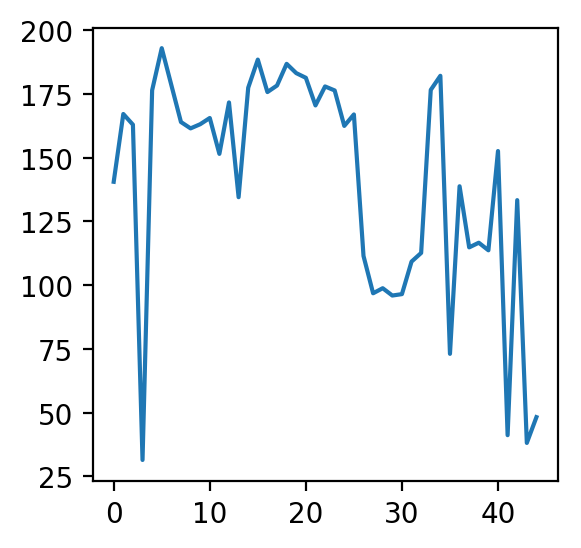

In [365]:
plt.plot(predicted_Test,)

In [378]:
df_result.join(df_test)

,0,Unnamed: 0,Unnamed: 0.1,Machine,csv_no,Duration,sl_mean,sl_std,sl_25,sl_50,...,vibration_3_75%,vibration_3_max,current_count,current_mean,current_std,current_min,current_25%,current_50%,current_75%,current_max
0,140.485,1,2,0,2,59.710,14.836691,5.881278,10.501419,14.859462,...,1.254537,15.588429,1548800,-0.300844,35.279274,-58.402241,-35.527079,-0.387075,34.868307,58.267598
1,167.065,2,3,0,3,59.846,15.368488,5.851054,11.017182,15.500351,...,1.262477,15.755909,1548800,-0.301342,35.249806,-59.048489,-35.496284,-0.373841,34.840155,58.585485
2,162.880,3,4,0,4,59.875,15.361418,5.940913,10.815760,15.594958,...,1.273960,16.693480,1548800,-0.306905,35.237985,-59.455185,-35.480134,-0.388486,34.816925,58.077216
3,31.400,5,6,0,6,59.691,20.480553,8.136197,17.258217,24.887844,...,1.457565,12.455540,1548800,-0.303977,37.298168,-60.964844,-37.396191,-0.472512,36.610885,60.222931
4,176.365,6,7,0,7,59.718,14.034980,7.346858,3.949095,19.702750,...,1.349210,10.788191,1548800,-0.313732,36.435230,-59.696525,-36.680694,-0.438927,35.912989,58.798350
5,192.890,7,8,0,8,59.690,19.323230,3.020703,20.096438,20.389416,...,1.382926,39.139585,1548800,-0.311604,35.799972,-59.669964,-36.096960,-0.402409,35.440352,58.825288
6,178.385,9,10,0,10,59.695,19.309403,3.786801,18.899350,20.954009,...,1.373764,12.067440,1548800,-0.312228,35.692090,-58.676915,-35.886532,-0.403977,35.167120,57.828225
7,163.920,10,1,1,1,59.776,18.912295,3.047976,19.647816,19.910276,...,1.390377,15.141938,1548800,-0.328833,35.530957,-58.082880,-35.766058,-0.458056,35.017686,57.490300
8,161.425,11,2,1,2,59.883,12.714587,6.769734,7.397687,13.492233,...,1.360693,42.141765,1548800,-0.314654,35.052633,-58.815554,-35.348206,-0.391826,34.712335,57.895208
9,163.055,12,3,1,3,59.828,18.444044,3.397564,19.403668,19.823298,...,1.387934,12.683855,1548800,-0.329328,35.429042,-58.121922,-35.664776,-0.444415,34.913762,57.296218


In [381]:
df_result=pd.DataFrame(predicted_Test)
df_result=df_result.join(df_test)
df_result.head(5)

,0,Unnamed: 0,Unnamed: 0.1,Machine,csv_no,Duration,sl_mean,sl_std,sl_25,sl_50,...,vibration_3_75%,vibration_3_max,current_count,current_mean,current_std,current_min,current_25%,current_50%,current_75%,current_max
0,140.485,1,2,0,2,59.710,14.836691,5.881278,10.501419,14.859462,...,1.254537,15.588429,1548800,-0.300844,35.279274,-58.402241,-35.527079,-0.387075,34.868307,58.267598
1,167.065,2,3,0,3,59.846,15.368488,5.851054,11.017182,15.500351,...,1.262477,15.755909,1548800,-0.301342,35.249806,-59.048489,-35.496284,-0.373841,34.840155,58.585485
2,162.880,3,4,0,4,59.875,15.361418,5.940913,10.815760,15.594958,...,1.273960,16.693480,1548800,-0.306905,35.237985,-59.455185,-35.480134,-0.388486,34.816925,58.077216
3,31.400,5,6,0,6,59.691,20.480553,8.136197,17.258217,24.887844,...,1.457565,12.455540,1548800,-0.303977,37.298168,-60.964844,-37.396191,-0.472512,36.610885,60.222931
4,176.365,6,7,0,7,59.718,14.034980,7.346858,3.949095,19.702750,...,1.349210,10.788191,1548800,-0.313732,36.435230,-59.696525,-36.680694,-0.438927,35.912989,58.798350


,0
0,210.325
1,226.800
2,223.700
3,220.665
4,214.795
5,208.020
6,206.100
7,207.180
8,197.170
9,192.370


In [382]:
resultfile='Model20181129_RandomForest_0.7Trained.csv'
resultfile='Model20181211_RandomForest_All_noOutlier_Trained.csv'
resultpath=os.path.join(ResultFolder,resultfile)
df_result.to_csv(resultpath)
resultpath

'H:\\12_Kaggle\\toollife\\pythonProject\\Result\\Model20181211_RandomForest_All_noOutlier_Trained.csv'